# Module 7: Introduction to Machine Learning
**Author: Caleb Sellinger**

**Githup Repo:** [Data Fundamentals M7](https://github.com/crsellinger/datafun-07-ml)

In [41]:
import jupyterlab as jpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

## Part 1 - Chart a Straight Line
Below is a linear relationship. Plotting Fahrenheit temperatures and their corresponding Celsius temperatures produces a straight line

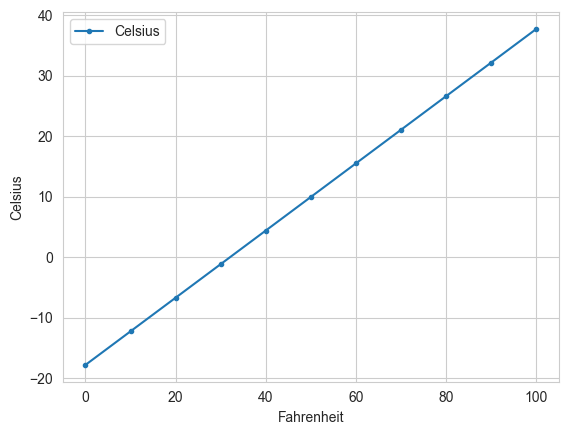

In [42]:
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0,101,10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius',style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
Loading the average high temperature in January in NYC from 1895 to 2018 CSV file.

In [43]:
nyc_df = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")

### Section 2 - Data Inspection
Using the head and tail methods to view the new dataframe

In [44]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [45]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [46]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [47]:
# divide by 100 and floor to produce just the year
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

In [48]:
pd.set_option('display.precision', 2)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### Section 5 - Build the Model

In [49]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
print(linear_regression.slope)

0.014771361132966163


In [50]:
print(linear_regression.intercept)

8.694993233674289


### Section 6 - Predict
Temperature prediction for 2024

In [51]:
# y = mx + b
print(linear_regression.slope * 2024 + linear_regression.intercept)

38.5922281667978


### Section 7 - Visualization

(10.0, 70.0)

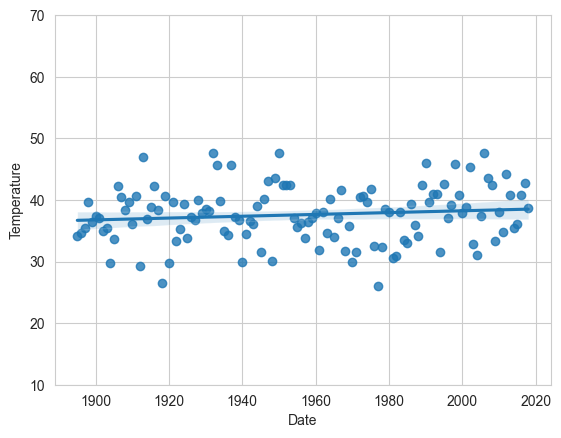

In [52]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)
X_train.shape

(93, 1)

In [54]:
X_test.shape

(31, 1)

In [55]:
# Training the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train,y=Y_train)

LinearRegression()

In [56]:
print(f"Slope: {linear_regression.coef_}")
print(f"Intercept: {linear_regression.intercept_}")

Slope: [0.01939167]
Intercept: -0.30779820252656975


### Section 2 - Test the Model

In [57]:
predict = linear_regression.predict(X_test)
expected = Y_test

for p, e in zip(predict[::5], expected[::5]):
    print(f"Predicted {p: .2f}, Expected: {e: .2f}")

Predicted  37.86, Expected:  31.70
Predicted  38.69, Expected:  34.80
Predicted  37.00, Expected:  39.40
Predicted  37.25, Expected:  45.70
Predicted  38.05, Expected:  32.30
Predicted  37.64, Expected:  33.80
Predicted  36.94, Expected:  39.70


Figure 1. Using more data

In [61]:
predict = linear_regression.predict(nyc_df.Date.values.reshape(-1, 1))
expected = nyc_df.Temperature.values

for p, e in zip(predict[::5], expected[::5]):
    print(f"Predicted {p: .2f}, Expected: {e: .2f}")

Predicted  36.44, Expected:  34.20
Predicted  36.54, Expected:  37.40
Predicted  36.63, Expected:  33.70
Predicted  36.73, Expected:  36.10
Predicted  36.83, Expected:  38.90
Predicted  36.92, Expected:  29.70
Predicted  37.02, Expected:  33.80
Predicted  37.12, Expected:  38.50
Predicted  37.22, Expected:  35.00
Predicted  37.31, Expected:  30.00
Predicted  37.41, Expected:  31.50
Predicted  37.51, Expected:  47.60
Predicted  37.60, Expected:  35.60
Predicted  37.70, Expected:  37.80
Predicted  37.80, Expected:  34.00
Predicted  37.89, Expected:  29.90
Predicted  37.99, Expected:  41.70
Predicted  38.09, Expected:  38.00
Predicted  38.18, Expected:  33.00
Predicted  38.28, Expected:  46.00
Predicted  38.38, Expected:  42.60
Predicted  38.48, Expected:  37.80
Predicted  38.57, Expected:  37.40
Predicted  38.67, Expected:  38.10
Predicted  38.77, Expected:  36.10


### Section 3 - Predict

In [37]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

# Predicting the temperature for year 2024
print(f"Avg high for 2024: {predict(2024)}*F")

Avg high for 2024: [38.94094855]*F


### Section 4 - Visualizations

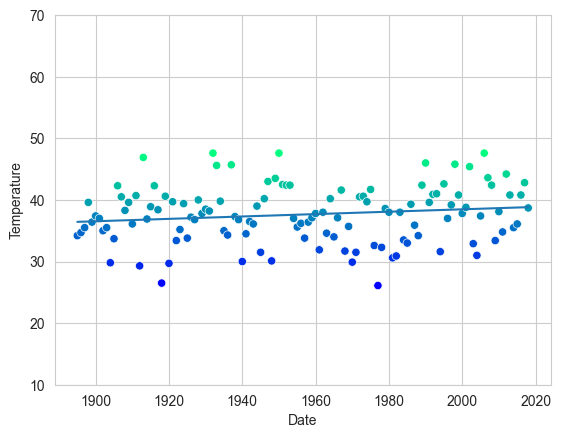

In [38]:
# Scatter plot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

# Trendline
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

##  Part 4 - Insights

In Part 2, we use a simple linear regression to predict past and future temperature plots. The model is as follows: *y = mx + b*. For any point *x*, we can calculate *y* given the slope and intercept, which was determined using the data set. In Part 3, we split the data set so that 1/3 is used for training the model. In this way, we can see how the model *learns* how to predict the trendline for past and future temperatures. If we train the model with enough data, as to not overfit it, it will predict almost the exact expected output of *y = mx + b*. Of course, machine learning models are asymptotic in nature, so we could never get an exact output but for most applications, such as engineering projects or non-algebraic formulas, it is good enough. The predictions our model makes seem poor, but there wasn't a huge sample size of data to train it. You can see this in Section 2, Figure 1 above using the whole data set to train then comparing predicted v expected.